# Implementation of Logistic Regression for Binary Classification

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from utils import gradient_descent, _compute_cost_logistic, predict

In [2]:
# Load dataset
path = "titanic_dataset/train.csv"
df = pd.read_csv(path)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df['Embarked'] = df['Embarked'].map({'C': 1, 'Q': 2, 'S' : 3})

In [3]:
# Choosing features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 48.9 KB


In [4]:
# Fill null values
X_filled = X.copy()

median_age = X_filled['Age'].median()
X_filled['Age'].fillna(median_age, inplace=True)

median_embarked = X_filled['Embarked'].median()
X_filled['Embarked'].fillna(median_embarked, inplace=True)

In [5]:
X_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 48.9 KB


In [6]:
# Normalize
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_filled)

# Split
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (712, 7)
y_train: (712,)
X_test: (179, 7)
y_test: (179,)


## From scratch implementation

In [7]:
# Initiate w and b
m, n = X_train.shape
w = np.zeros((n, ))
b = 0.0

In [8]:
# Initial cost
print(f"Initial cost: {_compute_cost_logistic(X_train, y_train, w, b)}")

Initial cost: 0.693147180559947


0th cost: 0.6800628572318415
100th cost: 0.45913714995835403
200th cost: 0.4501956155783674
300th cost: 0.4487138750417122
400th cost: 0.4483490727646867
500th cost: 0.44824232425255867
600th cost: 0.44820840988040067
700th cost: 0.44819718262347774
800th cost: 0.44819338547483434
900th cost: 0.4481920863158952


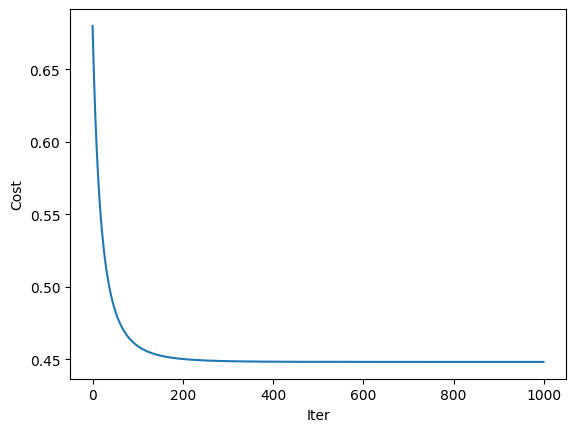

w = [-0.8074147  -1.3026707  -0.40554487 -0.3355811  -0.1038105   0.11923998
 -0.17559885]
b = -0.6257708010560766


In [9]:
# Run gradient descent
w_optimal, b_optimal = gradient_descent(X_train, y_train, w, b, 1e-1, 1000, True)
print(f"w = {w_optimal}\nb = {b_optimal}")

In [10]:
# Predict and Evaluation
p = predict(X_test, w_optimal, b_optimal)
print(f"Train accuracy: {np.mean(y_test == p) * 100}%")

Train accuracy: 81.00558659217877%


0th cost: 0.6800636857010386
100th cost: 0.460416979372899
200th cost: 0.45185941947979663
300th cost: 0.4504999785515039
400th cost: 0.45017872915110674
500th cost: 0.4500882861481224
600th cost: 0.45006058841582025
700th cost: 0.45005173869793663
800th cost: 0.4500488476829481
900th cost: 0.4500478918207857


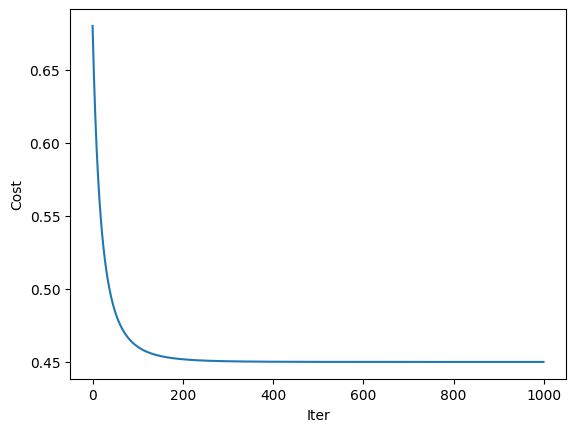

w = [-0.79071619 -1.28537583 -0.39502233 -0.32804705 -0.10050327  0.12278392
 -0.17456686]
b = -0.6226790966484087


In [11]:
# Regularization
w_reg, b_reg = gradient_descent(X_train, y_train, w, b, 1e-1, 1000, plot_cost_per_iter=True, lambda_=1)
print(f"w = {w_reg}\nb = {b_reg}")

In [12]:
# Predict and Evaluation
p_reg = predict(X_test, w_reg, b_reg)
print(f"Train accuracy: {np.mean(y_test == p_reg) * 100}%")

Train accuracy: 80.44692737430168%


## Scikit-learn implementation

**Note**: regularization is applied by default

In [13]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Weights and bias
print(f"w = {lr_model.coef_}")
print(f"b = {lr_model.intercept_}")

w = [[-0.7924248  -1.28568347 -0.39569525 -0.3280262  -0.10017964  0.12130978
  -0.17481493]]
b = [-0.62302257]


In [15]:
# Prediction
y_pred = lr_model.predict(X_test)
print(f"Prediction: {y_pred}")

Prediction: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [16]:
# Evaluation
print(f"Train accuracy: {lr_model.score(X_test, y_test)}")

Train accuracy: 0.8044692737430168


## Prediction on Target dataset

In [17]:
# Load dataset
df_test = pd.read_csv("titanic_dataset/test.csv")

In [18]:
# Repeat the procedure to preprocess data

# Encoding
df_test['Sex'] = df_test['Sex'].map({'male': 1, 'female': 0})
df_test['Embarked'] = df_test['Embarked'].map({'C': 1, 'Q': 2, 'S' : 3})

In [19]:
# Choosing features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df_test[features]

# Fill null values
X_filled = X.copy()

median_age = X_filled['Age'].median()
X_filled['Age'].fillna(median_age, inplace=True)

median_fare = X_filled['Fare'].median()
X_filled['Fare'].fillna(median_fare, inplace=True)

median_embarked = X_filled['Embarked'].median()
X_filled['Embarked'].fillna(median_embarked, inplace=True)

In [20]:
X_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [21]:
# Normalization
X_norm = scaler.fit_transform(X_filled)

In [22]:
# Prediction
predictions = lr_model.predict(X_norm)
print(predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [23]:
# Create submission file
submission = pd.DataFrame({'PassengerID': df_test['PassengerId'], 'Survived': predictions})
submission

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [24]:
# Turn to csv file
submission.to_csv('submission.csv', index=False)

## Result

Accuracy: 76.794%

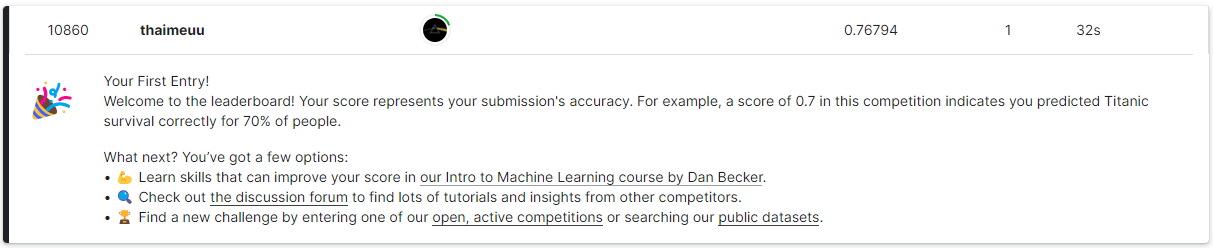